In [2]:
#Import statements for necessary package pandas and numpy
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Import statements for necessary package(s).
#Read in the dataset from a freely and easily available source on the internet.
google=pd.read_csv("googleplaystore.csv")
google.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [4]:
#Assign reasonable column names.
google.columns = ['AppName', 'Category', 'Rating', 'Reviews', 'Size', 
               'Installs', 'Type', 'Price', 'ContentRating','Genres','LastUpdated','CurrentVer','AndroidVer']

In [5]:
google.head()

,AppName,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
#Impute and assign median values for missing numeric values in the "Rating".
google.loc[:,"Rating"] = pd.to_numeric(google.loc[:, "Rating"], errors='coerce')
google.loc[:,"Rating"].unique()
HasNan = np.isnan(google.loc[:,"Rating"])
google.loc[HasNan, "Rating"] = np.nanmedian(google.loc[:,"Rating"])
google.loc[:,"Rating"].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,  3. ,
        1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,  1.8,
        2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

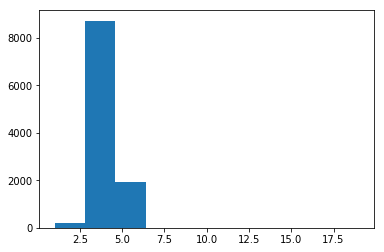

In [7]:
#Replace outliers that are three standardized deviations from the mean in the "Rating"
# First, I visualize the data using the histogram
plt.hist(google.loc[:,'Rating'])
plt.show()

In [8]:
# Replace outlier that were below 2.5 with 2.5 
TooLow = google.loc[:, "Rating"] < 2.5
google.loc[TooLow,"Rating"]=2.5

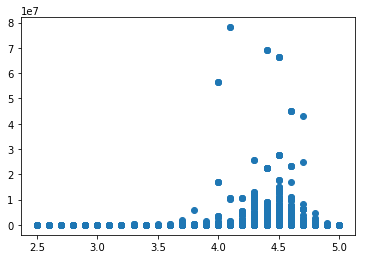

In [9]:
#Create a scatterplot. Use plt.show() after the scatterplot.
google.loc[:,"Reviews"] = pd.to_numeric(google.loc[:, "Reviews"], errors='coerce')
plt.scatter(google["Rating"],google["Reviews"])
plt.show()

In [11]:
# Write a function to calculate the standard deviation.

def stdCalculation(x):
    return(np.std(x))

In [14]:
# Apply the sd function to the ratings and reviews. 
rating_std=stdCalculation(google["Rating"])
review_std=stdCalculation(google["Reviews"])

In [16]:
# Print the sd for reviews and ratings
print(rating_std)
print(review_std)

0.4702758917732358
2927625.556462714


In [ ]:
# Summary of the data analysis in this file
# This Python script process the Google App Review Data. 
# First, I assign the column names to the dataset. 
# Second, I replace the NAs of the numerical varaible "Rating" with the median of the "Rating"
# Third, I plot the histsgraph of the "Rating". Based on it, I found below 2.5 points are too low
# Thus, when imput the data, I replace all the ratings below 2.5 with 2.5. 
# Then, I plot the histograph of "Rating" again
# Four, I draw the scatterplot between "Rating" and "Reviews". 
# Based on the plot, we found that people were more likely to write reviews for Apps with ratings between 4 to 4.7.
# And the amount of the reviews seem not differ too much between the extremely high and extremly low rating Apps. 
# Last, I created a function to calculate the standard deviations and applied it to "Rating" and "Reviews"